<a href="https://colab.research.google.com/github/zlximon/Tensorflow_DL/blob/master/CNN_and_computer_vision_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-05-11 17:10:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.201.128, 74.125.202.128, 64.233.182.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.201.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   130MB/s    in 0.8s    

2022-05-11 17:10:22 (130 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



#inspect the data

In [3]:
!ls pizza_steak 

test  train


In [4]:
import os 
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [5]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))#getting our class names 
print(class_names)

['pizza' 'steak']


In [6]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def random_img(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (382, 512, 3)


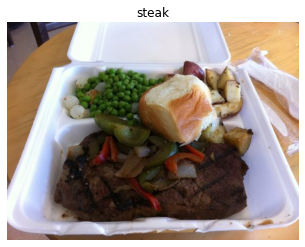

In [7]:
img=random_img(target_dir="pizza_steak/train/",target_class="steak")

In [8]:
tf.constant(img)   
img.shape# its return width ,height,color channels (RGB)


(382, 512, 3)

In [9]:
#first model 
import tensorflow as tf
from tensorflow.keras.preprocessing.image  import ImageDataGenerator
tf.random.set_seed(42)
#processing data 
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)
train_dir="/content/pizza_steak/train"
test_dir="pizza_steak/test"
train_data=train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
valid_data=valid_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


in this exmaple we divided our imges to batches that our model see images in batches

In [10]:
#creating model 
model1=tf.keras.Sequential([
tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.MaxPool2D(2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense( 1,activation="sigmoid")
])
model1.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history1=model1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 32s 367ms/step - loss: 0.5478 - accuracy: 0.7180 - val_loss: 0.4246 - val_accuracy: 0.8113
Epoch 2/5
47/47 [==============================] - 18s 380ms/step - loss: 0.4248 - accuracy: 0.8080 - val_loss: 0.3713 - val_accuracy: 0.8333
Epoch 3/5
47/47 [==============================] - 22s 473ms/step - loss: 0.4033 - accuracy: 0.8267 - val_loss: 0.3449 - val_accuracy: 0.8493
Epoch 4/5
47/47 [==============================] - 20s 419ms/step - loss: 0.3544 - accuracy: 0.8513 - val_loss: 0.3223 - val_accuracy: 0.8647
Epoch 5/5
47/47 [==============================] - 18s 375ms/step - loss: 0.3270 - accuracy: 0.8647 - val_loss: 0.2634 - val_accuracy: 0.9067


In [11]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

#testing our previous Neural Network model on this data set

In [12]:
tf.random.set_seed(42)
model2=tf.keras.Sequential([
tf.keras.layers.Flatten( input_shape=(224,224,3) ),                          
tf.keras.layers.Dense(4,activation="relu"),                            
tf.keras.layers.Dense(4,activation="relu"),                            
tf.keras.layers.Dense(1,activation="sigmoid")
])
model2.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history2=model2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 15s 318ms/step - loss: 0.9922 - accuracy: 0.4940 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 15s 319ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 14s 311ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 15s 312ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 15s 323ms/step - loss: 0.6932 - accuracy: 0.4747 - val_loss: 0.6931 - val_accuracy: 0.5000


In [13]:
#improving our model 2 (regular NN)
tf.random.set_seed(42)
model3=tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(224,224,3))          ,                  
tf.keras.layers.Dense(100,activation="relu")                            ,
tf.keras.layers.Dense(100,activation="relu"),
tf.keras.layers.Dense(100,activation="relu"),
tf.keras.layers.Dense(1,activation="sigmoid"),

])
model3.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history3=model3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 16s 322ms/step - loss: 3.0497 - accuracy: 0.6127 - val_loss: 1.2613 - val_accuracy: 0.6027
Epoch 2/5
47/47 [==============================] - 15s 313ms/step - loss: 0.7056 - accuracy: 0.7120 - val_loss: 0.9970 - val_accuracy: 0.6207
Epoch 3/5
47/47 [==============================] - 15s 314ms/step - loss: 0.7009 - accuracy: 0.7073 - val_loss: 0.4587 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 15s 314ms/step - loss: 0.5790 - accuracy: 0.7393 - val_loss: 0.7569 - val_accuracy: 0.5887
Epoch 5/5
47/47 [==============================] - 15s 313ms/step - loss: 0.5148 - accuracy: 0.7680 - val_loss: 0.4098 - val_accuracy: 0.8253


In [14]:
model3.summary()
#regular NN model has 15M params  but our CNN has 30K params and our CNN accuracy is better 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


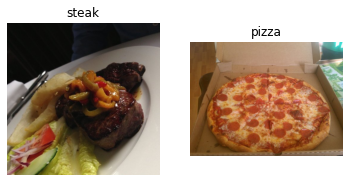

In [ ]:
#breaking down binary classification 
plt.figure()
plt.subplot(1,2,1)
steak_img=random_img("pizza_steak/train/","steak")
plt.subplot(1,2,2)
steak_img=random_img("pizza_steak/train/","pizza")


#preprocessing data 

In [ ]:
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"
# a batch is a small subset of data . 

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen =ImageDataGenerator(rescale=1/255.)
test_datagen =ImageDataGenerator(rescale=1/255.)

In [21]:
#Loading data and turn them to bathces 
train_data=train_datagen.flow_from_directory(directory=train_dir,target_size=(224,224),class_mode="binary",batch_size=32)
test_data=test_datagen.flow_from_directory(directory=test_dir,target_size=(224,224),class_mode="binary",batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [24]:
images,labels=train_data.next()
len(images),len(labels),len(train_data)


(32, 32, 47)

In [25]:
#create a model
tf.random.set_seed(42)
model4=tf.keras.Sequential([
tf.keras.layers.Conv2D(filters=10,kernel_size=3,strides=1,padding="valid",activation="relu",input_shape=(224,224,3))  ,    #input layrs               
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.Flatten(),
tf.keras.layers.Dense(1,activation="sigmoid")#output layers (for 1 out put , because we have binary classification)
])
model4.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])


array([1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.],
      dtype=float32)